In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style(style="darkgrid")

## 01 Exploring Seaborn Plots

### Histograms, KDE, and Densities

In [36]:
data = np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(data, columns=['x'])

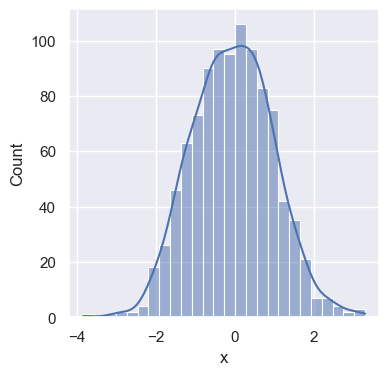

In [37]:
plt.figure(figsize=(4, 4))
sns.histplot(data['x'], kde=True);

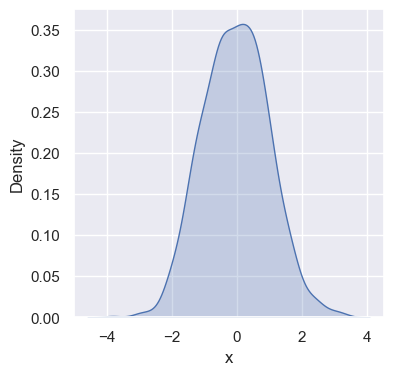

In [38]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data['x'], fill=True);

### Faceted Histograms

In [39]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

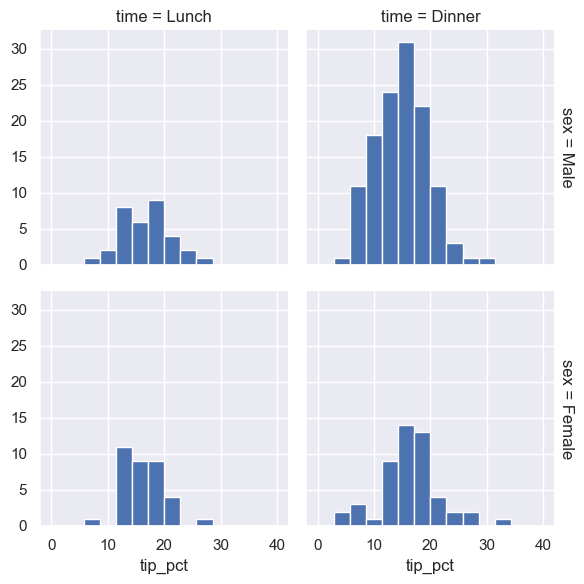

In [41]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Joint Distributions

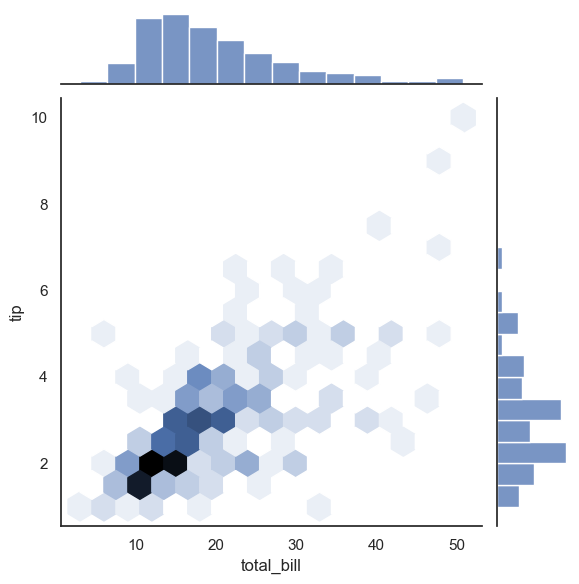

In [44]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

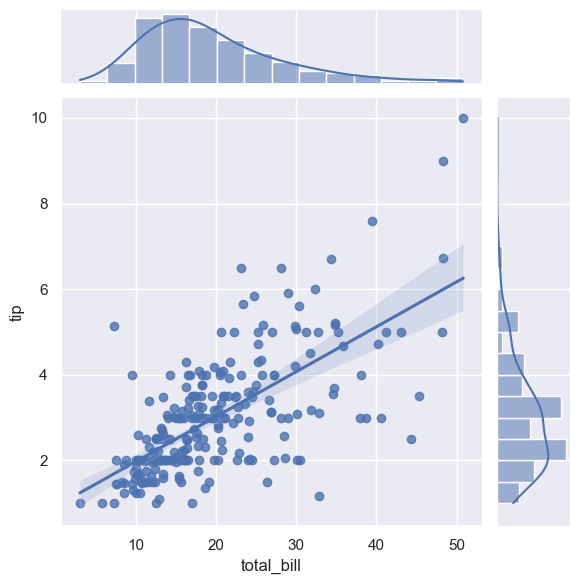

In [45]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

In [ ]:
# url = 'https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv'
# !cd data && curl -O {url}

## 02 Exploring Marathon Finishing Times

In [46]:
data = pd.read_csv('data/marathon-data.csv')

In [47]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [49]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [50]:
data = pd.read_csv('data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})

In [51]:
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [53]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9

In [54]:
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


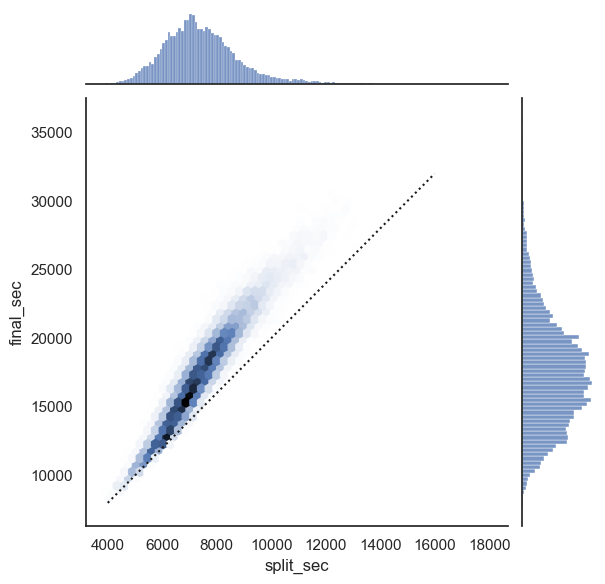

In [55]:
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec', y='final_sec', data=data, kind='hex') 
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [56]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

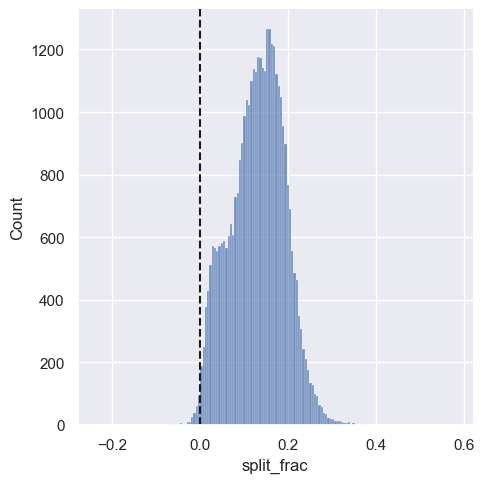

In [57]:
sns.displot(data['split_frac'], kde=False) 
plt.axvline(0, color="k", linestyle="--");

In [58]:
sum(data.split_frac < 0)

251

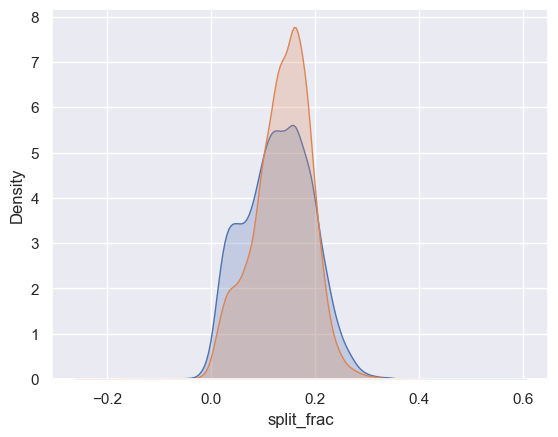

In [63]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True) 
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True) 
plt.xlabel('split_frac');